LaTex

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Bibliothèque

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
from sympy import symbols
from sympy import simplify, expand, collect, cancel, apart, trigsimp
from sympy import integrate, diff, series
sy.init_printing(use_unicode = True)

In [5]:
psi, theta, phi = symbols("psi, theta, phi", real=True)

# Matrices de passage (rotation)
def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [ -s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

# Matrices de changement de coordonnées (inverses de R)
def C_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, s],
                  [0, -s,  c]])
def C_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, -s],
                  [ 0, 1, 0],
                  [ s, 0, c]])

def C_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, s, 0],
                  [-s,  c, 0],
                  [0,  0, 1]])

def XYZ():
    return sy.Matrix([[1],[0],[0]]), sy.Matrix([[0],[1],[0]]), sy.Matrix([[0],[0],[1]])

# Rotation d'une toupie symétrique

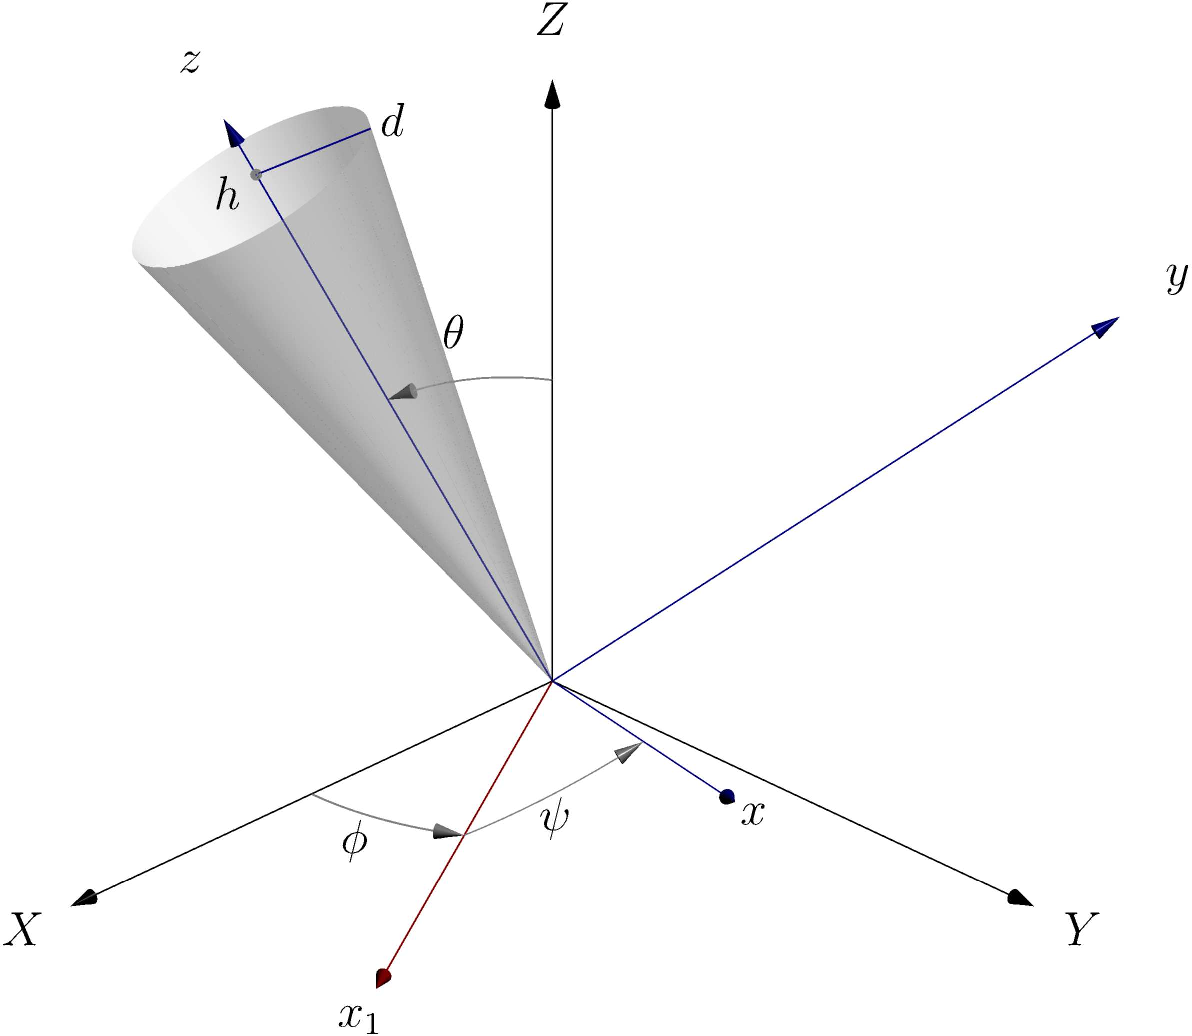

In [6]:
Image(filename='toupie.png', width=500)

## Calcul des moments

On considère un cône de hauteur $h$ et de rayon de base $d$. Il convient de placer l'origine de coordonnées au sommet du cône, avec $z$ l'axe de symétrie, et donc d'utiliser les coordonnées cylindriques $(r, \phi, z)$:
$$x = r \cos \phi,\; y = r \sin \phi,\; z = z$$
Ici, $\phi \in (0, 2\pi)$, $z \in (0,h)$ et le rayon est $r=0$ pour $z=0$ et $r=d$ pour $z=h$:
$$r = \frac{d}{h} z$$
($z>0$).

On calcule d'abord le volume du cône:
$$\int_0^h \D z \int_0^{dz/h} \D r \int_0^{2\pi} \D \phi = \frac{\pi d^2 h}{3}$$
et sa densité $\rho$ en fonction de sa masse $M$:
$$\rho = \frac{3M}{\pi d^2 h}$$

On calcule ensuite la position (sur l'axe $z$) du centre de masse:
$$R = \int_0^h \D z \int_0^{dz/h} \D r \int_0^{2\pi} \D \phi \, z = \frac{3 h}{4}$$

Le tenseur d'inertie est diagonal $I_1, I_2, I_3$; on le calcule d'abord par rapport au centre $O$,
\begin{align*}
I_1 &= \int_0^h \D z \int_0^{dz/h} \D r \int_0^{2\pi} \D \phi \, (r^2 \cos^2\phi + z^2) \\
I_2 &= \int_0^h \D z \int_0^{dz/h} \D r \int_0^{2\pi} \D \phi \, (r^2 \sin^2\phi + z^2) \\
I_3 &= \int_0^h \D z \int_0^{dz/h} \D r \int_0^{2\pi} \D \phi \, r^2
\end{align*}
et ensuite on tient compte de la translation au centre de masse $R$, $I_x, I_y, I_z$
$$I_x = I_1 - M R^2 ,\;
I_y = I_2 - M R^2 ,\;
I_z = I_3$$

### Moments d'inertie

On choisit le repère associé au cône est $(x,y,z)$ tel que $z$ est l'axe de symétrie, et la base est parallèle au plan $xy$:
$$I_x = I_y = \frac{3M}{20} \bigg(d^2 + \frac{h^2}{4} \bigg), \; I_z = \frac{3M}{10} d^2$$
Le centre de masse est à une distance $R$ du sommet $O$:
$$R = \frac{3h}{4}$$

In [7]:
d, h, M = sy.symbols("d, h, M", real=True)
r, phi, z = sy.symbols("r, phi, z", real=True)
pi = sy.pi

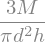

In [8]:
# volume
vol = sy.integrate(sy.integrate(sy.integrate(r, (phi, 0, 2*pi)), (r, 0, d*z/h)), (z,0,h))
rho = M/vol
rho

In [9]:
# fonction intégrale triple:
def integral(f):
    return sy.integrate(sy.integrate(sy.integrate(r * f, (phi, 0, 2*pi)), (r, 0, d*z/h)), (z,0,h))

In [10]:
# centre de masse
R = (rho/M)*integral(z)
R

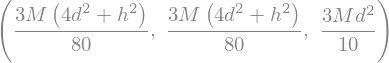

In [11]:
# moments d'inertie (notez que I_x = I_y)
# dans le repère du centre de masse
I_1 = rho * integral(r**2*sy.cos(phi)**2 + z**2)
I_2 = rho * integral(r**2*sy.cos(phi)**2 + z**2)
I_3 = rho * integral(r**2)

I_x = sy.simplify(I_1 - M*R**2)
I_y = sy.simplify(I_2 - M*R**2)
I_z = I_3
(I_x, I_y, I_z)

## Equation d'Euler

On calcule d'abord la vitesse angulaire dans le repère mobile

In [12]:
# tan(alpha) = d/h
alpha, h = sy.symbols("alpha, h", positive = True)
psi_t, theta_t, phi_t = sy.symbols("psi_t, theta_t, phi_t", real=True)
e_x, e_y, e_z = XYZ()

In [13]:
e_N = C_z(psi)*e_x
e_Z = C_z(psi)*C_x(theta)*e_z

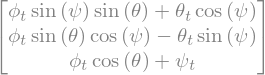

In [14]:
Omega = phi_t*e_Z + theta_t*e_N + psi_t*e_z
Omega

On calcule ensuite le moment cinétique $\bm L$ et le produit $\bm \Omega\wedge \bm L$

In [15]:
ox, oy, oz = sy.symbols("Omega_x, Omega_y, Omega_z")
oxt, oyt, ozt = sy.symbols("\dot\Omega_x, \dot\Omega_y, \dot\Omega_z")
Ix, Iy, Iz = sy.symbols("I_x, I_y, I_z")

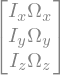

In [16]:
O = sy.Matrix([[ox],[oy],[oz]])
Ig = sy.Matrix([[Ix,0,0],[0,Iy,0],[0,0,Iz]])
L = Ig*O
L

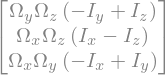

In [17]:
oL = sy.simplify( O.cross(L) )
oL

## Équations d'Euler

La variation "instantanée" du moment $\bm L$ est donnée par la formule générale, applicable à tout vecteur:
$$\left. \frac{\D \bm L}{\D t} \right|_{(X,Y,Z)} = \left. \frac{\D \bm L}{\D t} \right|_{(x,y,x)} + \left. \Omega \times \bm L \right|_{(x,y,z)}$$
où $(X,Y,Z)$ est le repère fixe, et $(x,y,z)$ le repére fixé au solide, mobile par rapport à $(X,Y,Z)$.

Dans le cas où le tenseur $I$ est diagonal, on a
\begin{align*}
\dot{L}_x &= I_x \frac{\D \Omega_x}{\D t} + (I_z-I_y)\Omega_y \Omega_z \\
\dot{L}_y &= I_y \frac{\D \Omega_y}{\D t} + (I_x-I_z)\Omega_x \Omega_z \\
\dot{L}_z &= I_z \frac{\D \Omega_z}{\D t} + (I_y-I_x)\Omega_x \Omega_y \\
\end{align*}

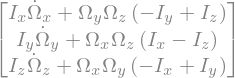

In [18]:
eq = sy.Matrix([[Ix*oxt + oL[0]], [Iy*oyt + oL[1]], [Iz*ozt + oL[2]]])
eq

Dans le cas du cône on a $I_x = I_z = I$, ce qui implique (voir la troisième équation)
$$I_z \dot{\bm \Omega}_z = 0$$
ou (voir calcul plus bas)
$$\dot\phi \cos\theta + \dot\psi = \text{const.}$$

Le deux premières équation peuvent donc s'écrire
$$\dot\Omega_x = -\omega \Omega_y \quad
\dot\Omega_y = \omega \Omega_x$$
où
$$\omega = \frac{I_z - I}{I} \Omega_z$$

La solution du système d'équations est
$$\Omega_x = a \cos(\omega t), \quad \Omega_y = a \sin(\omega t).$$
Notez que 
$$\sqrt{\Omega_x^2 + \Omega_y^2} = a$$
ne change pas au cours du temps.

En termes des angles d'Euler on a les équations (voir calcul plus bas):
\begin{gather}
\frac{\D}{\D t} \dot\theta = \omega \big( \dot\phi \sin\theta \big) \\
\frac{\D}{\D t} \big( \dot\phi \sin\theta \big) = -\omega \dot \theta
\end{gather}
On a pris $\psi=0$, puisque par symétrie on peut faire le choix $x = x_1$ (on fait coincider la lighe de noeuds avec l'axe $x$ mobile). Un autre choix, qui condiuit évidemment au même résultat, est de prendre $\dot\theta=0$, de fixer donc l'inclinaison du cône.

In [19]:
# toupie symétrique I_x = I_y
# on choisit x = x_1 (psi = 0)
I = sy.symbols("I")

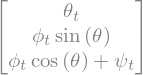

In [20]:
O_toupie = Omega.subs([(Ix,I),(Iy,I), (psi,0)])
O_toupie

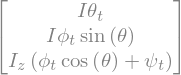

In [21]:
LO = Ig*Omega
L_toupie = LO.subs([(Ix,I),(Iy,I), (psi,0)])
L_toupie

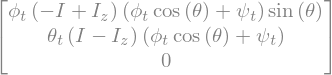

In [22]:
LO_toupie = sy.simplify( O_toupie.cross(L_toupie) )
LO_toupie

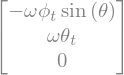

In [23]:
omega = sy.symbols("omega")
sy.simplify( LO_toupie.subs(phi_t*sy.cos(theta) + psi_t, omega/(I-Iz)) )

## Cas $\theta$ constant

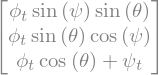

In [24]:
Omega.subs([(Ix,I),(Iy,I), (theta_t,0)])

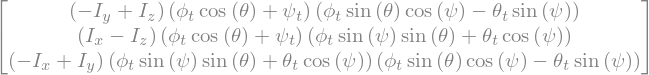

In [25]:
oLO = sy.simplify( Omega.cross(LO) )
oLO

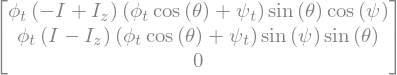

In [26]:
oLO.subs([(Ix,I),(Iy,I), (theta_t,0)])

On obtient les équations
$$\frac{\D}{\D t}\Big( \dot\phi \sin\theta \sin\psi \Big) = -\omega \dot\phi \sin\theta \cos\psi$$
et
$$\frac{\D}{\D t}\Big( \dot\phi \sin\theta \cos\psi \Big) = \omega \dot\phi \sin\theta \sin\psi$$
Elles impliquent:
$$\dot\phi \sin\theta = \mathrm{const}$$
($\sin \theta >0$) et
$$\dot\psi = -\omega$$
La première exprime la conservation de la valeur absolue du moment cinétique, et la deuxième la conservation de sa composante $z$.

### Cas $\psi = 0$

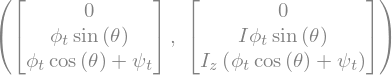

In [ ]:
o_0 = O_toupie.subs(theta_t,0)
L_0 = L_toupie.subs(theta_t,0)
o_0, L_0

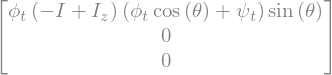

In [ ]:

M0 = sy.simplify( o_0.cross(L_0) )
M0

# Brouillon

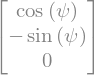

In [11]:
x1,y1,z1=XYZ()
C_z(psi)*x1

In [12]:
x1